In [131]:
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import glob
import time
plt.rcParams["figure.figsize"] = (3,3)

print (time.ctime())

Thu Aug 19 08:37:49 2021


In [132]:
# read a data file, store all data in arrays

#file = "/Users/andreinomerotski/Documents/Andrei/python/NSLS-II/Beamline_Cycles-50s_W0028_H07-210805-191240-1.csv"
file = "/Users/andreinomerotski/Documents/Andrei/python/NSLS-II/Beamline_Cycles-300s_W0028_H07-210805-191414-1.csv"

print (file)
print (time.ctime())

data=np.loadtxt(file, dtype= int, delimiter=",", usecols = (0,1,2,3))

y   = data[:, 0]
x   = data[:, 1]
t   = data[:, 2]
a   = data[:, 3]

for i in range(0,20):
    print (i, x[i],y[i],t[i],a[i])
    
print (len(t), time.ctime())

/Users/andreinomerotski/Documents/Andrei/python/NSLS-II/Beamline_Cycles-300s_W0028_H07-210805-191414-1.csv
0 144 176 158897297920 275
1 144 176 158954971648 250
2 144 176 159382069504 275
3 144 176 159554918144 100
4 144 176 159555070976 150
5 144 176 159728087296 25
6 144 176 160096237824 50
7 144 176 160827796992 25
8 144 176 161043235328 175
9 144 176 161170222336 25
10 144 176 161384406272 75
11 144 176 161480926464 25
12 144 176 161589220864 100
13 144 176 161759674368 50
14 144 176 161805819392 75
15 144 176 161805954304 50
16 144 176 162439164160 175
17 144 176 162678320384 150
18 144 176 162922593280 50
19 144 176 164705452032 100
134228432 Thu Aug 19 08:57:16 2021


'Thu Aug 19 08:57:45 2021'

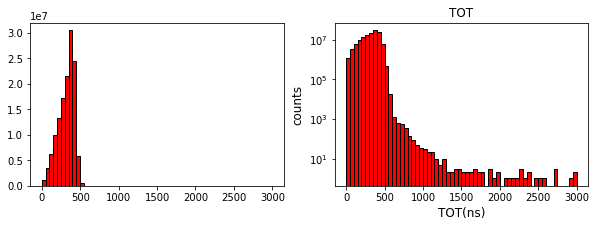

In [133]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(10, 3))

ax0.hist(a, bins = 60, range = (0, 3000), color = 'r', ec = 'k')
plt.title("TOT", fontsize = 12) # change the title
plt.xlabel('TOT(ns)',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
#plt.xlim(0, 240)
plt.yscale('log')
#plt.ylim(0, 10000)
#plt.show()

ax1.hist(a, bins = 60, range = (0, 3000), color = 'r', ec = 'k')
plt.title("TOT", fontsize = 12) # change the title
plt.xlabel('TOT(ns)',fontsize = 12)
plt.ylabel('counts',fontsize = 12)

time.ctime()


(0, 256)

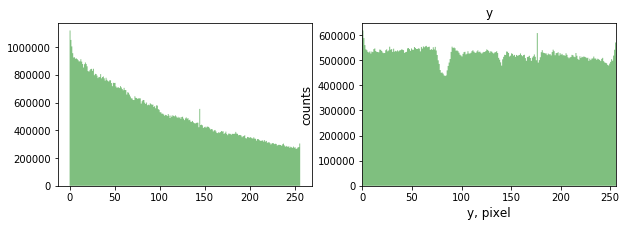

In [135]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(10, 3))

ax0.hist(x, bins = 256, range = (0, 256), color = 'g', alpha=0.5, histtype = 'stepfilled')
plt.title("x", fontsize = 12) # change the title
plt.xlabel('x, pixel',fontsize = 12)
plt.ylabel('counts',fontsize = 12)

ax1.hist(y, bins = 256, range = (0, 256), color = 'g', alpha=0.5, histtype = 'stepfilled')
plt.title("y", fontsize = 12) # change the title
plt.xlabel('y, pixel',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.xlim(0, 256)

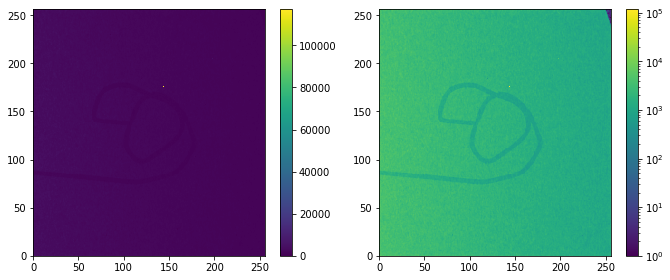

In [136]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(9.5, 4))

h = ax0.hist2d(x, y, bins = 256, range = [(0, 256), (0, 256)])
fig.colorbar(h[3], ax = ax0)

h = ax1.hist2d(x, y, bins = 256, range = [(0, 256), (0, 256)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax1)
fig.tight_layout()
plt.show()


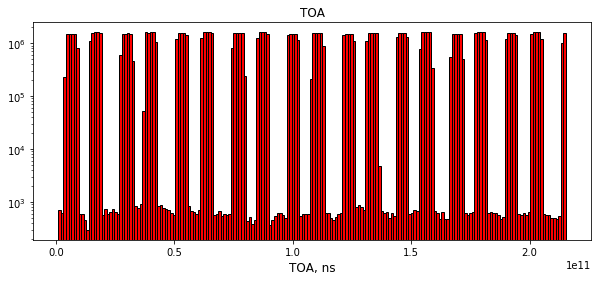

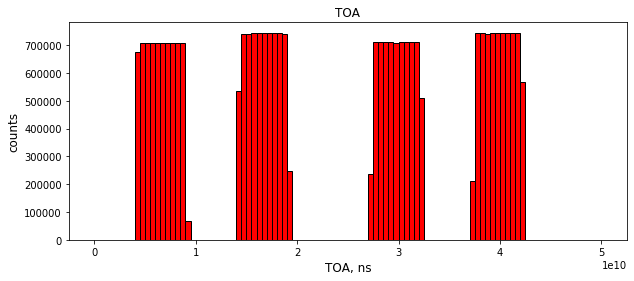

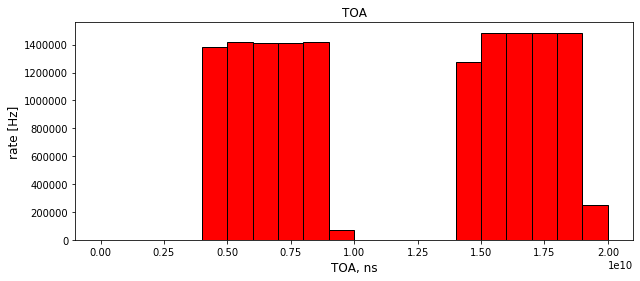

In [137]:
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(t/4096.*25., bins = 200, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.yscale('log')
plt.show()

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(t/4096.*25., bins = 100, range = (0.000E+11, 0.50001E+11), color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(t/4096.*25., bins = 20, range = (0., 2.0E+10), color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('rate [Hz]',fontsize = 12)
plt.show()


In [138]:
xon =[]; yon = []; xoff = []; yoff = []


tminon = 0.35E+10; tmaxon = 1.05E+10; tminoff = 1.35E+10; tmaxoff = 2.01E+10
p_specle = 2.2E+10; p_pair = 1.0E+10; exposure = 0.7E+10

for i in range(len(t)):
    if (tminon < t[i]/4096.*25 < tmaxon): 
        xon.append(x[i])
        yon.append(y[i])
    if (tminoff < t[i]/4096.*25 < tmaxoff): 
        xoff.append(x[i])
        yoff.append(y[i])
        
print(len(xon), len(xoff))

7114260 7456601


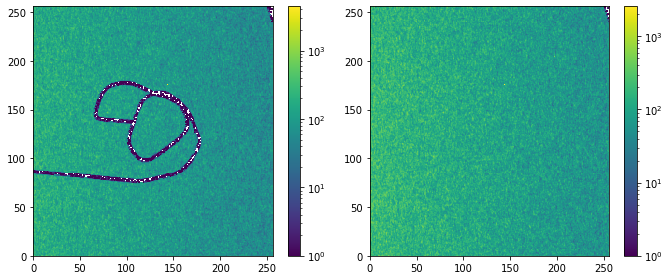

In [139]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(9.5, 4))

h = ax0.hist2d(xon, yon, bins = 256, range = [(0, 256), (0, 256)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax0)

h = ax1.hist2d(xoff, yoff, bins = 256, range = [(0, 256), (0, 256)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax1)

fig.tight_layout()
plt.show()

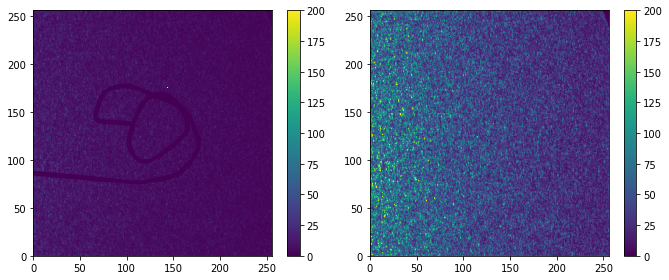

In [124]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(9.5, 4))

h00, bx0, by0, q0 = ax0.hist2d(xon, yon, bins = 256, range = [(0, 256), (0, 256)])
fig.colorbar(h[3], ax = ax0)

h01, bx1, by1, q1 = ax1.hist2d(xoff, yoff, bins = 256, range = [(0, 256), (0, 256)], cmax = 500)
fig.colorbar(h[3], ax = ax1)

fig.tight_layout()
plt.show()

In [76]:
xon1 =[]; yon1 = []; xoff1 = []; yoff1 = []


tminon1 = 2.5E+10; tmaxon1 = 3.5E+10; tminoff1 = 3.5E+10; tmaxoff1 = 4.5E+10

for i in range(len(t)):
    if (tminon1 < t[i]/4096.*25 < tmaxon1): 
        xon1.append(x[i])
        yon1.append(y[i])
    if (tminoff1 < t[i]/4096.*25 < tmaxoff1): 
        xoff1.append(x[i])
        yoff1.append(y[i])
        
print(len(xon), len(xoff))

7120883 7397603


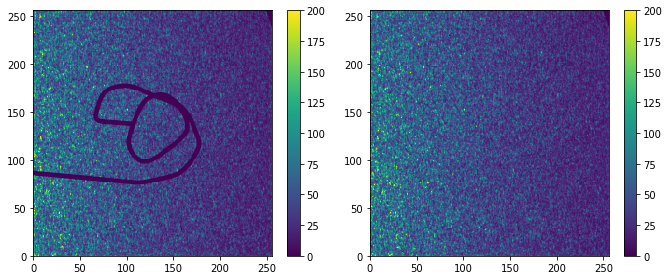

In [110]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(9.5, 4))

h10, bx0, by0, q0 = ax0.hist2d(xon1, yon1, bins = 256, range = [(0, 256), (0, 256)], cmax = 500)
fig.colorbar(h[3], ax = ax0)

h11, bx1, by1, q1 = ax1.hist2d(xoff1, yoff1, bins = 256, range = [(0, 256), (0, 256)], cmax = 500)
fig.colorbar(h[3], ax = ax1)

fig.tight_layout()
plt.show()

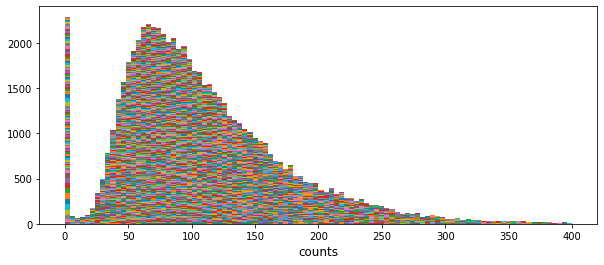

In [111]:
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(h10, bins = 100, range = (0,400), stacked = True)
plt.xlabel('counts',fontsize = 12)
plt.show()

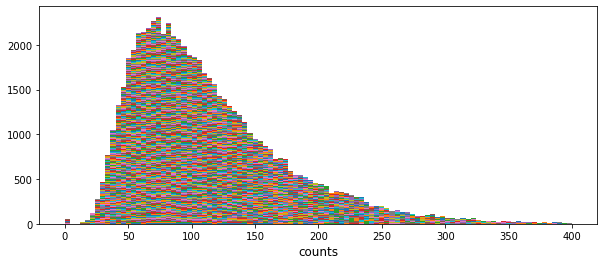

In [112]:
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(h11, bins = 100, range = (0,400), stacked = True)
plt.xlabel('counts',fontsize = 12)
plt.show()

In [113]:
dx0 = h01 - h00
dx1 = h11 - h10
ds12 = h01 - h11

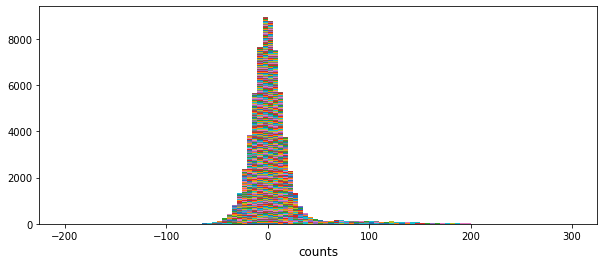

In [114]:
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(dx0, bins = 100, range = (-200,300), stacked = True)
plt.xlabel('counts',fontsize = 12)
#plt.yscale('log')
plt.show()

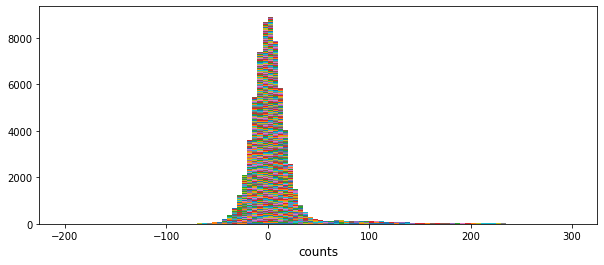

In [115]:
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(dx1, bins = 100, range = (-200,300), stacked = True)
plt.xlabel('counts',fontsize = 12)
#plt.yscale('log')
plt.show()

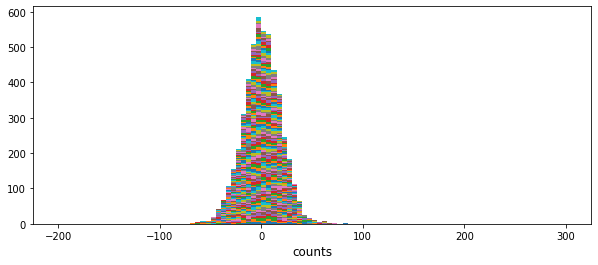

In [116]:
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(dx1[0:50,150:250], bins = 100, range = (-200,300), stacked = True)
plt.xlabel('counts',fontsize = 12)
plt.show()

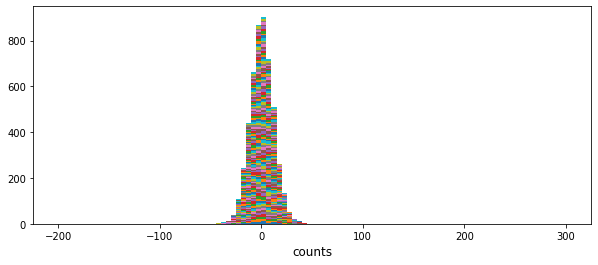

In [117]:
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(dx1[200:250,150:250], bins = 100, range = (-200,300), stacked = True)
plt.xlabel('counts',fontsize = 12)
plt.show()

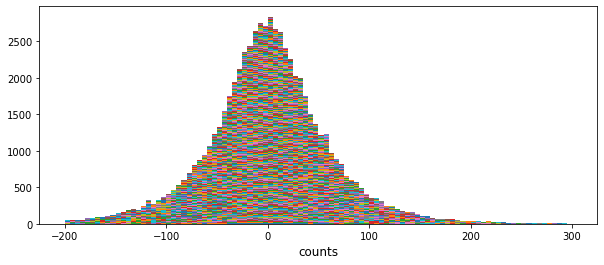

In [118]:
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(ds12, bins = 100, range = (-200,300), stacked = True)
plt.xlabel('counts',fontsize = 12)
#plt.yscale('log')
plt.show()

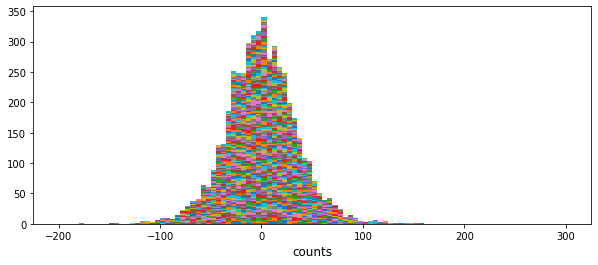

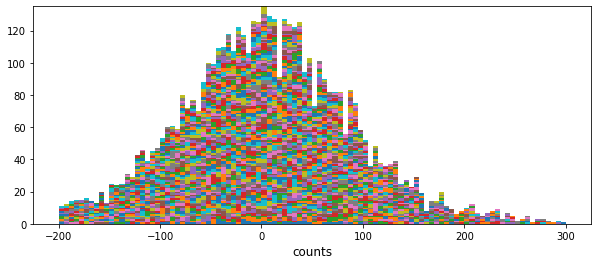

In [119]:
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(ds12[200:250,150:250], bins = 100, range = (-200,300), stacked = True)
plt.xlabel('counts',fontsize = 12)
plt.show()

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(ds12[0:50,150:250], bins = 100, range = (-200,300), stacked = True)
plt.xlabel('counts',fontsize = 12)
plt.show()

In [129]:
print (np.sum(h00))
print (np.corrcoef(h00))

7120883.0
[[ 1.          0.41106714  0.37534155 ...  0.00810647  0.04159412
   0.02473906]
 [ 0.41106714  1.          0.54449984 ... -0.07940117  0.07943625
   0.13056272]
 [ 0.37534155  0.54449984  1.         ... -0.0087676   0.19836731
   0.10476985]
 ...
 [ 0.00810647 -0.07940117 -0.0087676  ...  1.          0.37762722
   0.12736215]
 [ 0.04159412  0.07943625  0.19836731 ...  0.37762722  1.
   0.37906285]
 [ 0.02473906  0.13056272  0.10476985 ...  0.12736215  0.37906285
   1.        ]]
